/tmp/pkruyt/ipykernel_26640/2146591769.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.6)


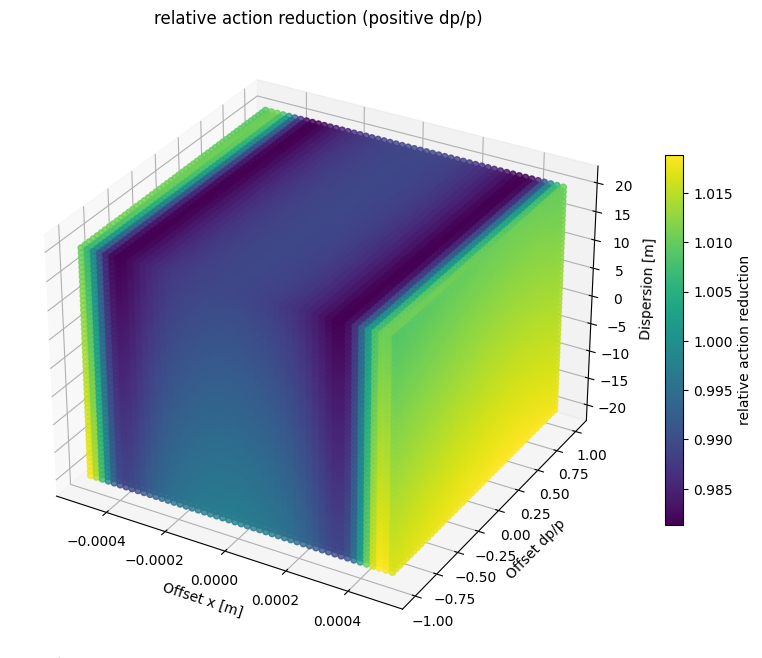

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load data
data = np.load('action_reduction_data_4d_pos.npz')
action_reduction = data['action_reduction']
offset_x_values = data['offset_x_values']
offset_dp_values = data['offset_dp_values']
disp_values = data['disp_values']

# set up figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# create meshgrid for 3D plot
X, Y, Z = np.meshgrid(offset_x_values, offset_dp_values, disp_values, indexing='ij')

# plot 3D heatmap
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=action_reduction.flatten(), cmap='viridis', alpha=0.8)

# set labels and title
ax.set_xlabel('Offset x [m]')
ax.set_ylabel('Offset dp/p')
ax.set_zlabel('Dispersion [m]')
ax.set_title('relative action reduction (positive dp/p)')
#ax.view_init(elev=20, azim=-120)  # Adjust the elevation (elev) and azimuth (azim) angles as needed

# add colorbar
mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(action_reduction.flatten())
cbar = fig.colorbar(mappable, shrink=0.6)
cbar.set_label('relative action reduction')

plt.show()


/tmp/pkruyt/ipykernel_26640/3821579081.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.6)


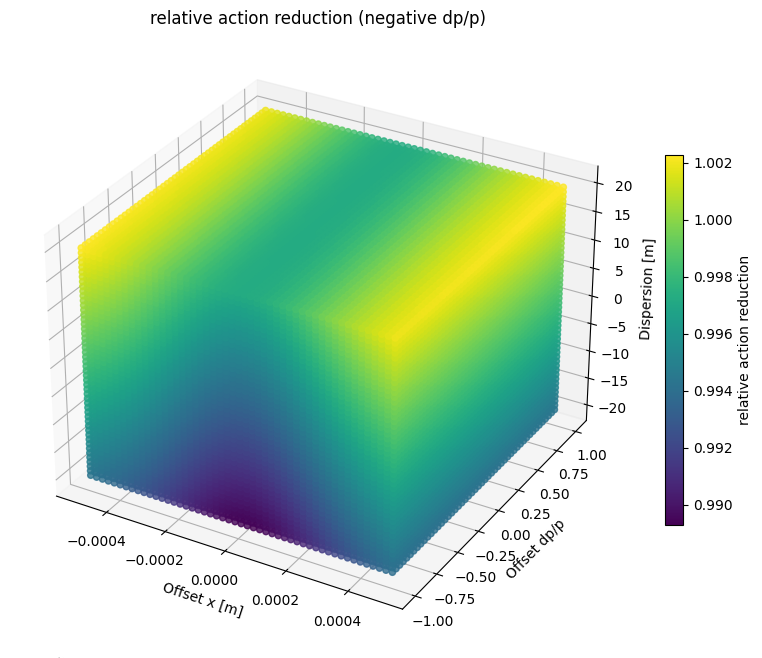

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load data
data = np.load('action_reduction_data_4d_neg.npz')
action_reduction = data['action_reduction']
offset_x_values = data['offset_x_values']
offset_dp_values = data['offset_dp_values']
disp_values = data['disp_values']

# set up figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# create meshgrid for 3D plot
X, Y, Z = np.meshgrid(offset_x_values, offset_dp_values, disp_values, indexing='ij')

# plot 3D heatmap
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=action_reduction.flatten(), cmap='viridis', alpha=0.8)

# set labels and title
ax.set_xlabel('Offset x [m]')
ax.set_ylabel('Offset dp/p')
ax.set_zlabel('Dispersion [m]')
ax.set_title('relative action reduction (negative dp/p)')
#ax.view_init(elev=20, azim=-120)  # Adjust the elevation (elev) and azimuth (azim) angles as needed

# add colorbar
mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(action_reduction.flatten())
cbar = fig.colorbar(mappable, shrink=0.6)
cbar.set_label('relative action reduction')

plt.show()


/tmp/pkruyt/ipykernel_26640/308332188.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.6)


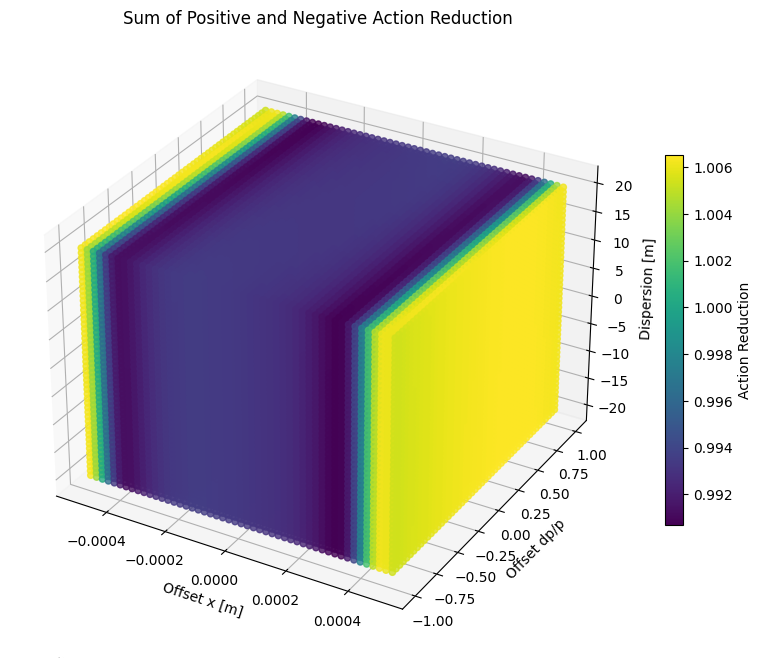

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load the positive and negative data
data_pos = np.load('action_reduction_data_4d_pos.npz')
data_neg = np.load('action_reduction_data_4d_neg.npz')

# Extract the data from the loaded files
action_reduction_pos = data_pos['action_reduction']
action_reduction_neg = data_neg['action_reduction']
offset_x_values = data_pos['offset_x_values']
offset_dp_values = data_pos['offset_dp_values']
disp_values = data_pos['disp_values']

# Compute the sum of positive and negative action reduction data
action_reduction_sum = (action_reduction_pos + action_reduction_neg)/2

# Create meshgrid for plotting
offset_x_mesh, offset_dp_mesh, disp_mesh = np.meshgrid(offset_x_values, offset_dp_values, disp_values, indexing='ij')

# Plot the sum of positive and negative action reduction data as a heatmap
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(offset_x_mesh.flatten(), offset_dp_mesh.flatten(), disp_mesh.flatten(), c=action_reduction_sum.flatten(), cmap='viridis', alpha=0.8)

# Set labels and title
ax.set_xlabel('Offset x [m]')
ax.set_ylabel('Offset dp/p')
ax.set_zlabel('Dispersion [m]')
ax.set_title('Sum of Positive and Negative Action Reduction')

# Add colorbar
mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(action_reduction_sum.flatten())
cbar = fig.colorbar(mappable, shrink=0.6)
cbar.set_label('Action Reduction')

plt.show()


In [26]:
# Find the coordinates of the minimum point
min_index = np.unravel_index(np.argmin(action_reduction_sum), action_reduction_sum.shape)
min_disp_index, min_offset_x_index, min_offset_dp_index = min_index
min_disp = disp_values[min_disp_index]
min_offset_x = offset_x_values[min_offset_x_index]
min_offset_dp = offset_dp_values[min_offset_dp_index]
min_action_reduction = action_reduction_sum[min_disp_index, min_offset_x_index, min_offset_dp_index]

# Print the coordinates and value of the minimum point
print("Minimum Point:")
print("Disp_x:", min_disp)
print("Offset_x:", min_offset_x)
print("Offset_dp:", min_offset_dp)
print("Action Reduction:", min_action_reduction)


Minimum Point:
Disp_x: -12.653061224489797
Offset_x: 0.0005
Offset_dp: -1e-09
Action Reduction: 0.9906998617519209
